# **An Investigation into the Iris Dataset**

In [273]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## *Exploratory Data Analysis*

### Preliminary EDA  

I first conducted a preliminary exploratory analysis to explore the underlying structure, health and baseline characteristics of the dataset before proceeding on to further analysis.  
This initial step included the following:  
  1. I imported the dataset via csv file, located in the repository, and read it through pandas  
  2. I examined the datasets structure and dimensions, along with feature names, target names and variable types to familiarise myself with the dataset.  
  3. I checked for missing values, duplicate rows, deleted duplicated rows and examined the balance of the datasets target variables using a countplot, to confirm data quality and balance.  
  4. lastly, I reviewed the datasets descriptive statistics, to gain an initial understanding of the dataset's distribution.

In [274]:
# Import the dataset via .csv file,
# & read through pandas
iris = pd.read_csv('iris.csv')

To import the dataset, I used the pd.read_csv() function, which reads in csv files into a dataframe ([GeeksforGeeks](https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/)). By doing so, this enabled me to perform an efficent analysis and manipulation on the dataset.

In [275]:
# Investigate shape of dataset
iris.shape

(150, 5)

The .shape() function outputs the shape of the dataset as a tuple ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)). The output shows that the dataset contains 150 rows (number of flowers) and 5 columns.

In [276]:
# View sample of the dataset
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
45,4.8,3.0,1.4,0.3,setosa
22,4.6,3.6,1.0,0.2,setosa
85,6.0,3.4,4.5,1.6,versicolor
10,5.4,3.7,1.5,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
129,7.2,3.0,5.8,1.6,virginica
11,4.8,3.4,1.6,0.2,setosa
75,6.6,3.0,4.4,1.4,versicolor
4,5.0,3.6,1.4,0.2,setosa
139,6.9,3.1,5.4,2.1,virginica


The .sample() function returns a random sample of the dataset, the amount of samples to display are specified within the brackets ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)). Here, 10 samples of the dataset are displayed. 

In [277]:
# View feature names
iris.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

The .columns() function displays the column names ([pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)). I utilized negative index slicing ([Seen here: GeeksforGeeks, 2025](https://www.geeksforgeeks.org/python-list-slicing/])) to ensure that only the feature names were included in the output. The output displays that there are four features: sepal lenght, sepal width, petal length and petal width. 

In [278]:
# View target names
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

The .unique() function returns the unique values as an array ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)). The above output shows that the target variables include: setosa, versicolor and virginica. 

In [279]:
# View data types
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

The .dtypes() function returns the data type of each column ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)). The output shows that species is stored as an object and that the four features are stored as floats. 

In [280]:
# Check for missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

The .isnull().sum() function detects the amount of missing values in a dataset ([GeeksforGeeks, 2025](https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/)). The output shows no missing values. This is advantageous, as missing values negatively impact the accuracy, validity and reliability of statistical inferences ([GeeksforGeeks](https://www.geeksforgeeks.org/impact-of-missing-data-on-statistical-analysis/)).

In [281]:
# Check for duplicates
iris.duplicated().sum()

3

The .duplicated().sum() function outputs the number of duplicated rows in the dataset ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)). The output shows that there are 3 duplicated rows in the iris dataset. Although the dataset is small, I decided to proceed with removing the duplicated rows to improve the accuracy of analysis.

In [282]:
# View duplicated rows
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


The .duplicated() function identifies the duplicated rows within a dataframe ([Bobbitt, 2021](https://www.statology.org/pandas-find-duplicates/)). Here, it is clear that both setosa and virginica have duplicated rows. 

In [283]:
# Drop duplicates
iris_df = iris.drop_duplicates()

The drop_duplicates() function returns the dataframe with the duplicated rows removed ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)). The iris_df variable will now return the iris dataset with the duplicates removed.

<Axes: xlabel='species', ylabel='count'>

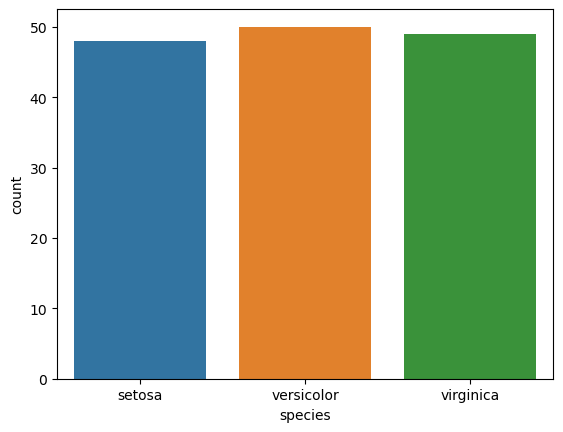

In [284]:
# Check for balance in the target variable
sns.countplot(x ='species', hue = "species", data = iris_df)

# Save the plot as a .png file
#plt.savefig('species_count.png')

The sns.countplot() function returns a graph displaying the frequency of values in a categorical variable ([seaborn](https://seaborn.pydata.org/generated/seaborn.countplot.html)). The plt.savefig() function saves a figure as the specified file format ([matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)). I decided to include the countplot to create a visual representation of the species frequency after removal of the duplicated rows. The output shows that the removal of the duplicated rows has introduced only a slight imbalance. I decided to retain this version of the dataset as it has been noted that the machine learning algorithms that I will be conducting later are robust enough to deal with minor imbalances ([Ganganwar, 2012](https://www.researchgate.net/publication/292018027_An_overview_of_classification_algorithms_for_imbalanced_datasets)).

In [285]:
# Generate descriptive statistics summary of dataset
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The describe() function generates descriptive statistics of the imported dataset ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)). I decided to generate a descriptive statitics summary to briefly observe the distribution of the dataset features. The output shows that the count of each feature has now changed after dropping the duplicated rows. Additionally, sepal width has the least variability, whilst petal length has the highest variability based on the std. 

In [286]:
# Save summary as .txt file
with open('iris_summary.txt', 'w') as file:
    file.write(iris_df.describe().to_string())

To save the summary to a .txt file I followed advice from ([python help](https://www.pythonhelp.org/questions/how-to-get-python-output-in-text-file/)). Additonally, the .to_string() function was utilized as it converts the specified output to a plain text string, improving its readability ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_string.html)). 

### Univariate Analysis

For the next stage of the investigation, I conducted a univariate analysis to get a closer look at the distribution and characteristics of the individual features within the dataset. This involved the creation of histograms and boxplots for each feature. Histograms were employed to visualize the frequency distribution and assess the symmetry, modality, and potential skewness of the data. Boxplots were used to highlight central tendency, spread, and the presence of outliers. 

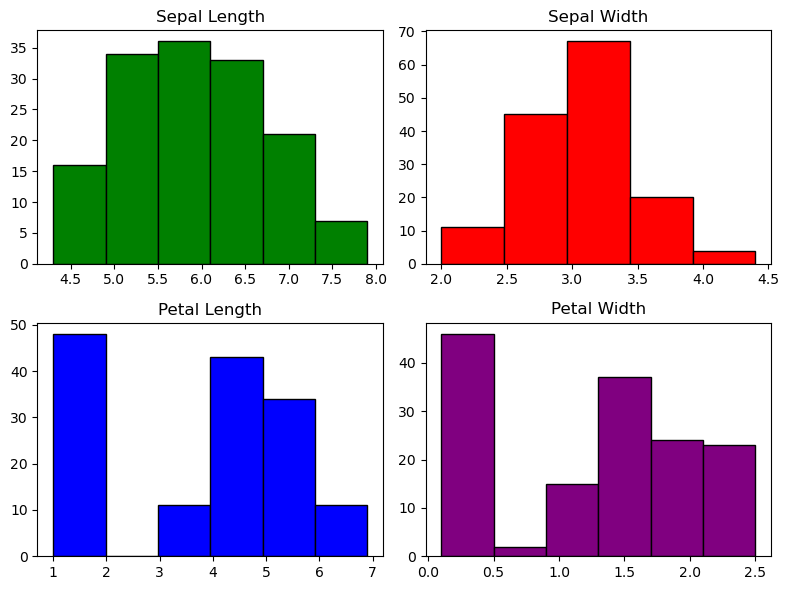

In [ ]:
# Create histograms for each feature

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

# Create histogram for sepal length
ax[0,0].hist(iris_df['sepal_length'], bins=6, color='green', edgecolor='black')
# Set the figure title
ax[0,0].set_title("Sepal Length")

# Create histogram for sepal width
ax[0,1].hist(iris_df['sepal_width'], bins=5, color='red', edgecolor='black')
# Set the figure title
ax[0,1].set_title("Sepal Width")

# Create histogram for petal length
ax[1,0].hist(iris_df['petal_length'], bins=6, color='blue', edgecolor='black')
# Set the figure title
ax[1,0].set_title("Petal Length")

# Create histogram for petal width
ax[1,1].hist(iris_df['petal_width'], bins=6, color='purple', edgecolor='black')
# Set the figure title
ax[1,1].set_title("Petal Width")

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the histogram as a .png file
#plt.savefig('features_histogram.png')

To create the above histograms I used the following sources: [GeeksforGeeks, 2024](https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/), [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html).  
The output shows that the distribution of features reveal distinct patterns. Sepal length is most frequent between 5.5 and 6.0 cm (30–35 instances), while sepal width peaks between 3.0 and 3.5 cm with around 70 observations, indicating lower variability. Petal length is concentrated in the 1.0 to 2.0 cm range (around 50 instances), and petal width is most common between 0.0 and 0.5 cm (40–50 instances). These distributions suggest that petal measurements may offer stronger discriminatory power between the species.

<Axes: >

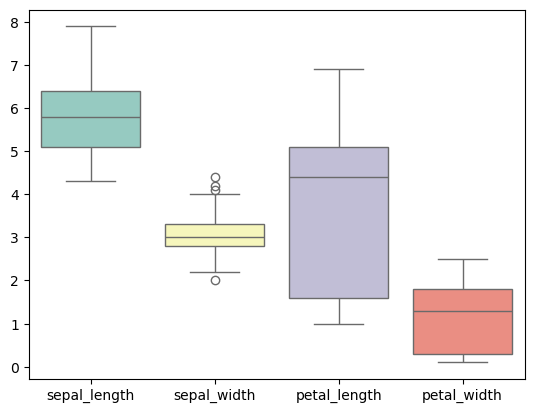

In [288]:
# Create boxplot of each feature
sns.boxplot(data=iris_df, orient='v', palette='Set3')

# Save the boxplot as a .png file
#plt.savefig('features_boxplot.png')


sns.boxplot() creates boxplots of the features side by side, enabling comparisons ([seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html)). To create the above boxplot I followed [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) for guidance.  
The boxplot reveals that sepal length has a relatively symmetric distribution with moderate spread, while sepal width is more compact and displays four outliers. Petal length shows the greatest variability, with a wide range and spread, indicating substantial differences across samples. Petal width is concentrated near lower values, suggesting skewness as seen in the prior histogram. Overall, the higher variability in petal features, particularly petal length, suggests they may offer greater discriminatory power between the iris species.

### Feature Distribution by Species

In [289]:
# Create violin plots of each feature by species
                                                                                


https://www.geeksforgeeks.org/violin-plot-for-data-analysis/

### Bivariate Analysis

### Correlation Analysis

### Multidimensional Data Exploration

### Baseline Modeling

### Conclusion of Findings